# 3D CNN Network

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DL_assignment_Sagnik
Trainset: 60000
Testset: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   

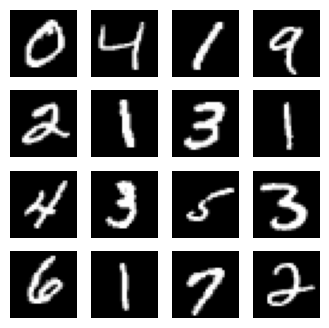

In [ ]:
#importing the data loader func made in tensorflow
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Sagnik_B21320_DL_Assgn

%run 2a(TF).ipynb

In [ ]:
#relevant libraries
import numpy as np
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential

In [ ]:
#creating sub-patches from an image
#images are of 28x28 res so with a 4x4 patchsize we get 49 sub patches
def image_sub_patches(image, patch_size=4):
    sub_patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            sub_patches.append(patch)
    return np.array(sub_patches)

In [ ]:
#stacking sub-patches to create video
def create_video(sub_patches, frames=10):
    time, height, width = sub_patches.shape

    #repeating or stacking each patch to create time stamps
    video_data = np.repeat(sub_patches[np.newaxis, :, :, :], frames, axis=0)
    video_data = video_data.reshape((frames, time, height, width, 1))
    return video_data

In [ ]:
#calling the funcs to create subpatches and video
patch_size=4
frames=10
trainset_sub_patches = [image_sub_patches(image, patch_size=patch_size) for image in train_images]
testset_sub_patches = [image_sub_patches(image, patch_size=patch_size) for image in test_images]

trainset_video = [create_video(sub_patches, frames) for sub_patches in trainset_sub_patches]
testset_video = [create_video(sub_patches, frames) for sub_patches in testset_sub_patches]

In [ ]:
#normalizing
trainset_video = np.array(trainset_video) / 255.0
testset_video= np.array(testset_video) / 255.0

In [ ]:
#3d cnn model
model = models.Sequential([
    layers.Conv3D(16, kernel_size=(3, 3, 3), activation='relu', input_shape=(10,4,4,1)),
    layers.Conv3D(32, kernel_size=(2, 2, 2), activation='relu'),
    layers.MaxPooling3D(pool_size=(1, 1, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#the number of layers is kept less to avoid negative dimensioning error

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 8, 2, 2, 16)       448       
                                                                 
 conv3d_1 (Conv3D)           (None, 7, 1, 1, 32)       4128      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 7, 1, 1, 32)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense (Dense)               (None, 128)               28800     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
model.fit(trainset_video, train_labels, epochs=5, batch_size=64, validation_data=(testset_video, test_labels))